In [1]:
import gv

ModuleNotFoundError: No module named 'gv'

In [26]:
import graphviz
def gv(s): return graphviz.Source('digraph G{rankdir="LR"' + s + '; }')
def tgv(s): return gv('\n\tbgcolor=transparent\n\t' + s + ';')

In [4]:
!pip install graphviz

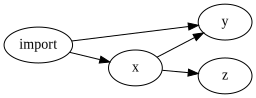

In [24]:
gv('import->x->y;import->y;x->z')

In [19]:
from graphviz import Digraph

g = Digraph('G', filename='cluster.gv')

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

g.attr(bgcolor="transparent")
g.format = "png"

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

g.render(view=True)

g.source

'digraph G {\n\tbgcolor=transparent\n\tsubgraph cluster_0 {\n\t\tnode [color=white style=filled]\n\t\tcolor=lightgrey style=filled\n\t\ta0 -> a1\n\t\ta1 -> a2\n\t\ta2 -> a3\n\t\tlabel="process #1"\n\t}\n\tsubgraph cluster_1 {\n\t\tnode [style=filled]\n\t\tcolor=blue\n\t\tb0 -> b1\n\t\tb1 -> b2\n\t\tb2 -> b3\n\t\tlabel="process #2"\n\t}\n\tstart -> a0\n\tstart -> b0\n\ta1 -> b3\n\tb2 -> a3\n\ta3 -> a0\n\ta3 -> end\n\tb3 -> end\n\tstart [shape=Mdiamond]\n\tend [shape=Msquare]\n}'